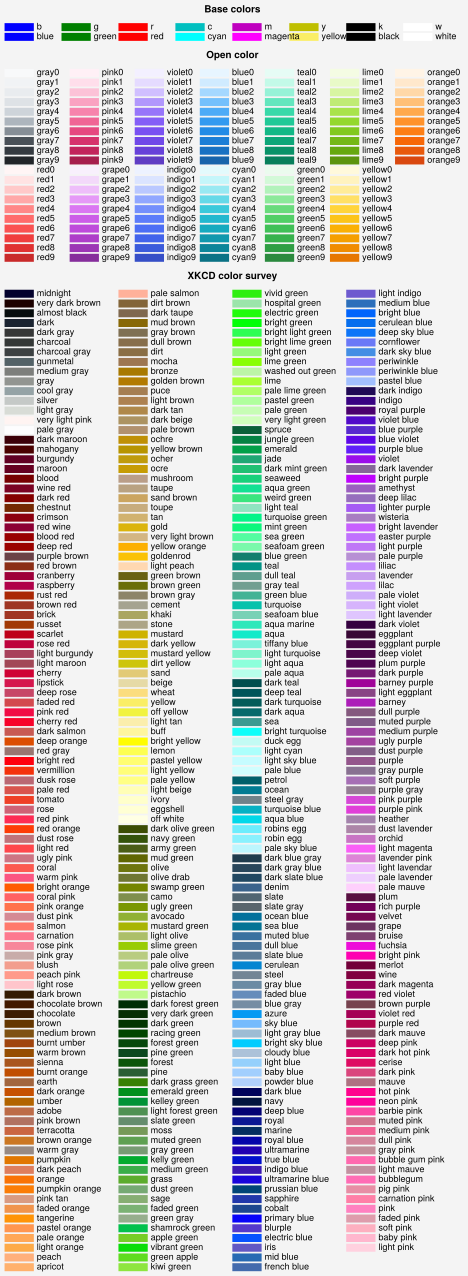

In [1]:
import proplot as pplt
fig, axs = pplt.show_colors()

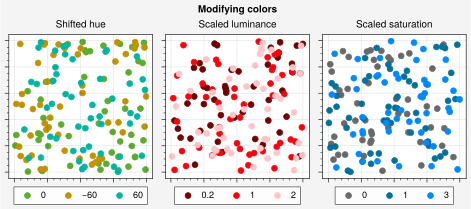

In [2]:
import proplot as pplt
import numpy as np

# Figure
state = np.random.RandomState(51423)
fig, axs = pplt.subplots(ncols=3, axwidth=2)
axs.format(
    suptitle='Modifying colors',
    toplabels=('Shifted hue', 'Scaled luminance', 'Scaled saturation'),
    toplabelweight='normal',
    xformatter='none', yformatter='none',
)

# Shifted hue
N = 50
fmt = pplt.SimpleFormatter()
marker = 'o'
for shift in (0, -60, 60):
    x, y = state.rand(2, N)
    color = pplt.shift_hue('grass', shift)
    axs[0].scatter(x, y, marker=marker, c=color, legend='b', label=fmt(shift))

# Scaled luminance
for scale in (0.2, 1, 2):
    x, y = state.rand(2, N)
    color = pplt.scale_luminance('bright red', scale)
    axs[1].scatter(x, y, marker=marker, c=color, legend='b', label=fmt(scale))

# Scaled saturation
for scale in (0, 1, 3):
    x, y = state.rand(2, N)
    color = pplt.scale_saturation('ocean blue', scale)
    axs[2].scatter(x, y, marker=marker, c=color, legend='b', label=fmt(scale))

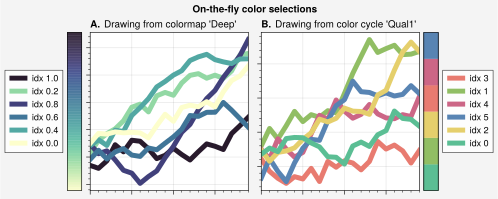

In [3]:
import proplot as pplt
import numpy as np

# Drawing from colormaps
fig = pplt.figure(refwidth=2.2, share=False)
ax = fig.subplot(121)
name = 'Deep'
idxs = pplt.arange(0, 1, 0.2)
state = np.random.RandomState(51423)
state.shuffle(idxs)
for idx in idxs:
    data = (state.rand(20) - 0.4).cumsum()
    h = ax.plot(
        data, lw=5, color=(name, idx),
        label=f'idx {idx:.1f}', legend='l', legend_kw={'ncols': 1}
    )
ax.colorbar(pplt.Colormap(name), loc='l', locator='none')
ax.format(title=f'Drawing from colormap {name!r}', grid=True)

# Drawing from color cycles
ax = fig.subplot(122)
name = 'Qual1'
idxs = np.arange(6)
state.shuffle(idxs)
for idx in idxs:
    data = (state.rand(20) - 0.4).cumsum()
    h = ax.plot(
        data, lw=5, color=(name, idx),
        label=f'idx {idx:.0f}', legend='r', legend_kw={'ncols': 1}
    )
ax.colorbar(pplt.Colormap(name), loc='r', locator='none')
ax.format(title=f'Drawing from color cycle {name!r}')
fig.format(
    abc='A.', titleloc='l',
    suptitle='On-the-fly color selections',
    xformatter='null', yformatter='null',
)